In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones.

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

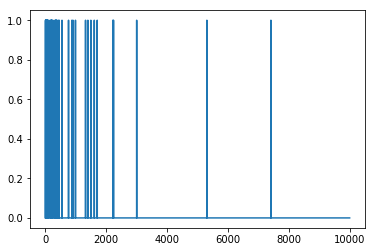

In [3]:
plt.plot(train_data[11])

In [4]:
#A baseline model
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 21s - loss: 0.4701 - acc: 0.8073 - binary_crossentropy: 0.4701 - val_loss: 0.3257 - val_acc: 0.8783 - val_binary_crossentropy: 0.3257
Epoch 2/20
 - 13s - loss: 0.2396 - acc: 0.9140 - binary_crossentropy: 0.2396 - val_loss: 0.2847 - val_acc: 0.8853 - val_binary_crossentropy: 0.2847
Epoch 3/20
 - 9s - loss: 0.1770 - acc: 0.9383 - binary_crossentropy: 0.1770 - val_loss: 0.2919 - val_acc: 0.8844 - val_binary_crossentropy: 0.2919
Epoch 4/20
 - 11s - loss: 0.1420 - acc: 0.9514 - binary_crossentropy: 0.1420 - val_loss: 0.3188 - val_acc: 0.8785 - val_binary_crossentropy: 0.3188
Epoch 5/20
 - 12s - loss: 0.1184 - acc: 0.9612 - binary_crossentropy: 0.1184 - val_loss: 0.3461 - val_acc: 0.8734 - val_binary_crossentropy: 0.3461
Epoch 6/20
 - 13s - loss: 0.0984 - acc: 0.9694 - binary_crossentropy: 0.0984 - val_loss: 0.3782 - val_acc: 0.8684 - val_binary_crossentropy: 0.3782
Epoch 7/20
 - 13s - loss: 0.0823 - acc: 0.9765 - binary_crossen

In [6]:
#smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.5973 - acc: 0.7134 - binary_crossentropy: 0.5973 - val_loss: 0.4965 - val_acc: 0.8430 - val_binary_crossentropy: 0.4965
Epoch 2/20
 - 10s - loss: 0.3962 - acc: 0.8829 - binary_crossentropy: 0.3962 - val_loss: 0.3646 - val_acc: 0.8752 - val_binary_crossentropy: 0.3646
Epoch 3/20
 - 14s - loss: 0.2879 - acc: 0.9077 - binary_crossentropy: 0.2879 - val_loss: 0.3095 - val_acc: 0.8842 - val_binary_crossentropy: 0.3095
Epoch 4/20
 - 10s - loss: 0.2321 - acc: 0.9232 - binary_crossentropy: 0.2321 - val_loss: 0.2899 - val_acc: 0.8872 - val_binary_crossentropy: 0.2899
Epoch 5/20
 - 13s - loss: 0.1977 - acc: 0.9350 - binary_crossentropy: 0.1977 - val_loss: 0.2858 - val_acc: 0.8855 - val_binary_crossentropy: 0.2858
Epoch 6/20
 - 9s - loss: 0.1728 - acc: 0.9423 - binary_crossentropy: 0.1728 - val_loss: 0.2848 - val_acc: 0.8868 - val_binary_crossentropy: 0.2848
Epoch 7/20
 - 13s - loss: 0.1534 - acc: 0.9503 - binary_crossen

In [8]:
#bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 27s - loss: 0.3461 - acc: 0.8528 - binary_crossentropy: 0.3461 - val_loss: 0.3021 - val_acc: 0.8770 - val_binary_crossentropy: 0.3021
Epoch 2/20
 - 21s - loss: 0.1344 - acc: 0.9509 - binary_crossentropy: 0.1344 - val_loss: 0.3640 - val_acc: 0.8619 - val_binary_crossentropy: 0.3640
Epoch 3/20
 - 20s - loss: 0.0404 - acc: 0.9888 - binary_crossentropy: 0.0404 - val_loss: 0.4462 - val_acc: 0.8686 - val_binary_crossentropy: 0.4462
Epoch 4/20
 - 25s - loss: 0.0061 - acc: 0.9994 - binary_crossentropy: 0.0061 - val_loss: 0.5865 - val_acc: 0.8702 - val_binary_crossentropy: 0.5865
Epoch 5/20
 - 26s - loss: 6.6857e-04 - acc: 1.0000 - binary_crossentropy: 6.6857e-04 - val_loss: 0.6750 - val_acc: 0.8716 - val_binary_crossentropy: 0.6750
Epoch 6/20
 - 23s - loss: 2.2651e-04 - acc: 1.0000 - binary_crossentropy: 2.2651e-04 - val_loss: 0.7121 - val_acc: 0.8720 - val_binary_crossentropy: 0.7121
Epoch 7/20
 - 22s - loss: 1.4404e-04 - acc: 1.

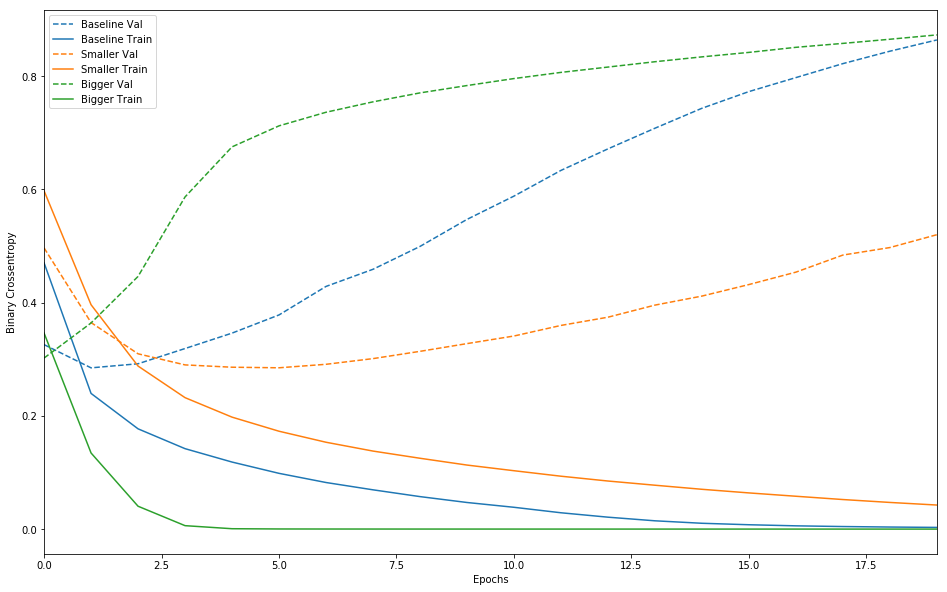

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# solution1 - add weight regularization

A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5531 - acc: 0.8051 - binary_crossentropy: 0.5128 - val_loss: 0.4078 - val_acc: 0.8732 - val_binary_crossentropy: 0.3673
Epoch 2/20
 - 3s - loss: 0.3253 - acc: 0.9048 - binary_crossentropy: 0.2805 - val_loss: 0.3401 - val_acc: 0.8869 - val_binary_crossentropy: 0.2920
Epoch 3/20
 - 2s - loss: 0.2681 - acc: 0.9242 - binary_crossentropy: 0.2176 - val_loss: 0.3345 - val_acc: 0.8874 - val_binary_crossentropy: 0.2822
Epoch 4/20
 - 3s - loss: 0.2418 - acc: 0.9354 - binary_crossentropy: 0.1881 - val_loss: 0.3393 - val_acc: 0.8846 - val_binary_crossentropy: 0.2846
Epoch 5/20
 - 3s - loss: 0.2269 - acc: 0.9419 - binary_crossentropy: 0.1709 - val_loss: 0.3511 - val_acc: 0.8814 - val_binary_crossentropy: 0.2944
Epoch 6/20
 - 3s - loss: 0.2142 - acc: 0.9483 - binary_crossentropy: 0.1569 - val_loss: 0.3596 - val_acc: 0.8789 - val_binary_crossentropy: 0.3020
Epoch 7/20
 - 3s - loss: 0.2069 - acc: 0.9509 - binary_crossentropy:

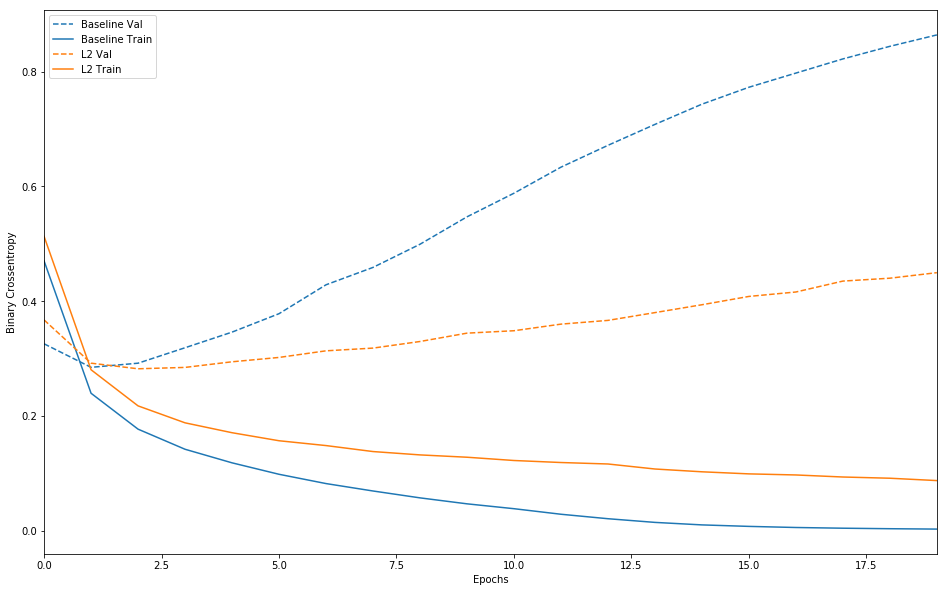

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# Solution 2 : Add dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, 
developed by Hinton and his students at the University of Toronto. 

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.
Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; 
after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. 

The "dropout rate" is the fraction of the features that are being zeroed-out;
it is usually set between 0.2 and 0.5. At test time, no units are dropped out,
and instead the layer's output values are scaled down by a factor equal to the dropout rate,
so as to balance for the fact that more units are active than at training time.

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6367 - acc: 0.6315 - binary_crossentropy: 0.6367 - val_loss: 0.5103 - val_acc: 0.8440 - val_binary_crossentropy: 0.5103
Epoch 2/20
 - 4s - loss: 0.4508 - acc: 0.8044 - binary_crossentropy: 0.4508 - val_loss: 0.3289 - val_acc: 0.8810 - val_binary_crossentropy: 0.3289
Epoch 3/20
 - 4s - loss: 0.3342 - acc: 0.8744 - binary_crossentropy: 0.3342 - val_loss: 0.2808 - val_acc: 0.8879 - val_binary_crossentropy: 0.2808
Epoch 4/20
 - 4s - loss: 0.2731 - acc: 0.9020 - binary_crossentropy: 0.2731 - val_loss: 0.2725 - val_acc: 0.8885 - val_binary_crossentropy: 0.2725
Epoch 5/20
 - 4s - loss: 0.2331 - acc: 0.9196 - binary_crossentropy: 0.2331 - val_loss: 0.2791 - val_acc: 0.8858 - val_binary_crossentropy: 0.2791
Epoch 6/20
 - 4s - loss: 0.2015 - acc: 0.9314 - binary_crossentropy: 0.2015 - val_loss: 0.2908 - val_acc: 0.8850 - val_binary_crossentropy: 0.2908
Epoch 7/20
 - 4s - loss: 0.1788 - acc: 0.9372 - binary_crossentropy:

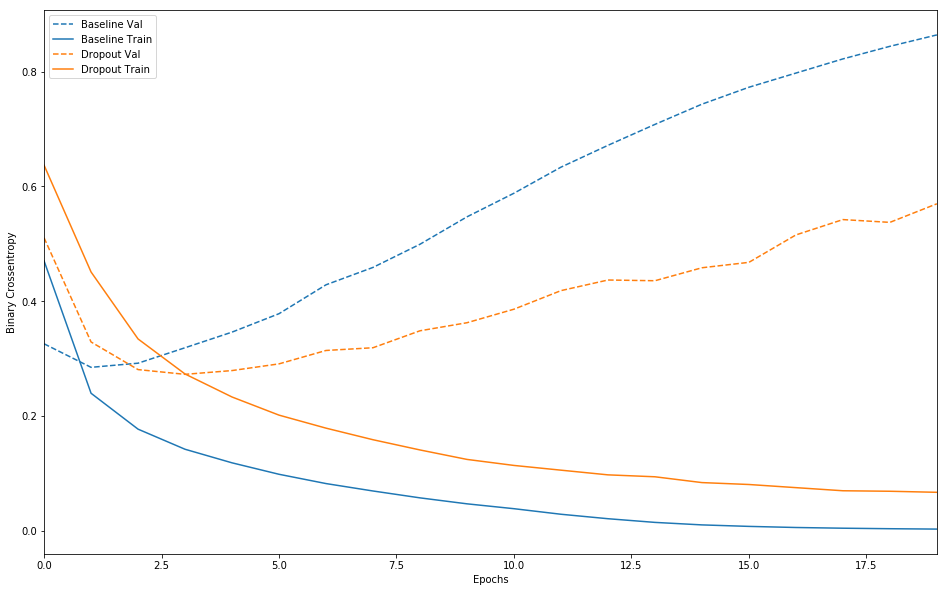

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history),
            ])

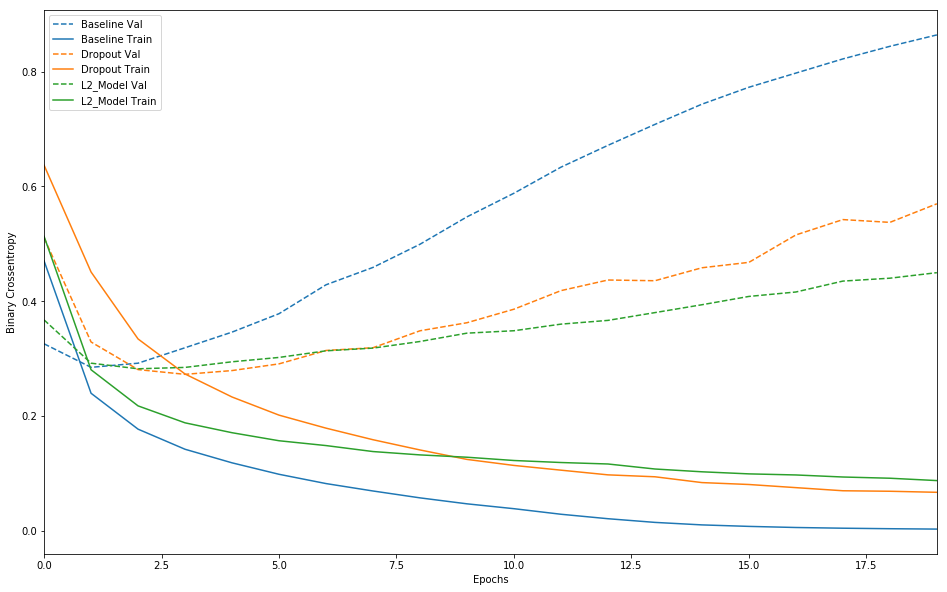

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history),
              ('l2_model', l2_model_history)
            ])

Here l2 regularization seems to be more effective.